In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chapter 2 Exercises
At this point in the text, the exercises are given at the end of each section instead of at the end of the chapter. Therefore there are way too many problems that I can be realistically expected to solve. With that in mind, I'm only going to do the first few problems in each section and only do the challenge problems if I think I need to strengthen my understanding or if I'm particularly interested in the topic.

## Section 2.1
#### 2.1

Compare the exact solution for the velocity as a function of time without air resistance with the numerical results in FIgure 2.1 and show that they agree. 

----
*my work*

We've actually already solved for the exact solution. Recall, 

$$v = \sqrt{v_0^2 + 2Pt/m},$$

so all we have to do is translate that into code. 

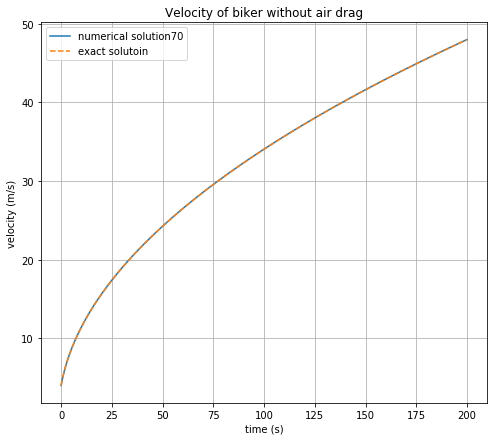

In [10]:
# Initialize variables
P = 400    # Watts
m = 70     # kg
v0 = 4     # m/s
t0 = 0     # initial tim, s
tf = 200   # final time
dt = 1/10  # time step


# Create vectors
t = np.arange(t0,tf,dt)
v = np.zeros(t.size)
v[0] = v0

# Compute exact solution
vAn = np.sqrt(v0**2 + 2*P*t/m)

# Compute numerical solution
for i in range(v.size-1):
    dv = P/(m*v[i])
    v[i+1] = v[i] + dv*dt
    
# Plot solution
fig = plt.figure(figsize=(8,7))
plt.plot(t,v, label='numerical solution')
plt.plot(t,vAn,'--', label='exact solutoin')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Velocity of biker without air drag')
plt.legend()
plt.show()

#### 2.2

Investigate the effect of varying both the rider's power and frontal area on the ultimate velocity. In particular, for a rider in the middle of a pack, the effective frontal area is about 30 percent less than for a rider at the front. How much less energy does a rider in the pack expend expend than does one at the front, assuming they both move at a velocity of 13 m/s?

----
*my work*

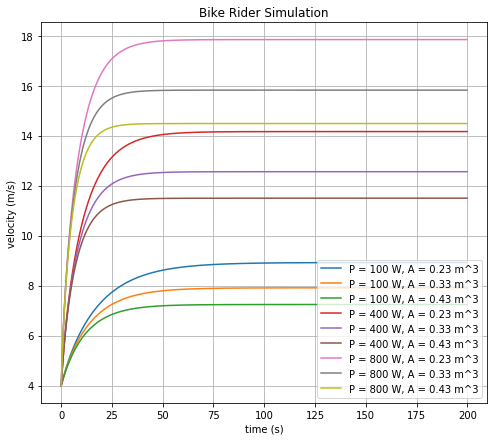

In [28]:
# Initialize variables
P = np.array([100, 400, 800])     # Watts
m = 70      # kg
A = np.array([0.23, 0.33, 0.43])    # frontal area, m^2
C = 1       # drag coefficient
rho = 1.225 # density of air, kg/m^3
v0 = 4      # m/s
t0 = 0      # initial tim, s
tf = 200    # final time
dt = 1/10   # time step


# Create vectors
t = np.arange(t0,tf,dt)
v = np.zeros(t.size) # velocity with drag
v[0] = v0


fig = plt.figure(figsize=(8,7))      # Prep figure for plotting

for n in range(P.size):              # Loop for power
    for j in range(A.size):          # Loop for frontal area
        for i in range(v.size-1):    # Euler loop
            dv = P[n]/(m*v[i]) - (C*rho*A[j]*v[i]**2/(2*m))
            v[i+1] = v[i] + dv*dt
        plt.plot(t,v, label='P = '+str(P[n])+' W, A = '+str(A[j])+' m^3')
    
# Plot solution
plt.grid()
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Bike Rider Simulation')
plt.show()

Both $P$ and $A$ seem to have the effect of lowering the terminal velocity. Additionally, $A$ appears to impact the time it takes the rider to reach terminal velocity; small $A$ takes longer to reach tv and large $A$ reaches tv more quickly. This makes sense since in the limit that $A \to 0$, the term on the right goes to zero. This is the same as there being no drag and the rider will never reach terminal velocity. 

To explore the difference in power between a rider in the middle of the pack and a rider in the front, we first need an expression for terminal velocity. Terminal velocity is reached when $\frac{dv}{dt}$ approaches zero, or $0 = \frac{P}{mv} - \frac{C\rho Av^2}{2m}$. We can solve for $v$ to get

$$ v_t = \sqrt[3]{\frac{2P}{C\rho A}}. $$

Note the $3$ denoted a cube root. This expression seems to agree with the numerical results. Since we know that both cyclers are moving at $13$ m/s, we can equate the expression for terminal velocity for both riders. 

$$ \sqrt[3]{\frac{2P_m}{C\rho A_m}} = \sqrt[3]{\frac{2P_f}{C\rho A_f}}, $$

where the subscript $m$ is used to denote middle and $f$ front. We also know that $A_m = (1-0.3)A_f$, so, solving for $P_m$, the above expression simplifies to

$$ P_m = P_f\frac{(1-0.3)A_f}{A_f} $$
$$ = 0.7P_f $$

so the power exerted by the rider in the middle is 70 percent of that exerted by the rider in the front, or *30 percent less*. 